# TP11: Clasificación
## Sebastian Carreño Marin - 2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Se importan las librerías**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Se descomprime el dataset**

In [3]:
!unzip "/content/drive/My Drive/Colab Notebooks/dataset_Car_Bike.zip"

Archive:  /content/drive/My Drive/Colab Notebooks/dataset_Car_Bike.zip
   creating: dataset_Car_Bike/
   creating: dataset_Car_Bike/train/
   creating: dataset_Car_Bike/train/moto/
  inflating: dataset_Car_Bike/train/moto/Bike (1).jpeg  
  inflating: dataset_Car_Bike/train/moto/Bike (1).jpg  
  inflating: dataset_Car_Bike/train/moto/Bike (1).png  
  inflating: dataset_Car_Bike/train/moto/Bike (2).jpeg  
  inflating: dataset_Car_Bike/train/moto/Bike (2).jpg  
  inflating: dataset_Car_Bike/train/moto/Bike (2).png  
  inflating: dataset_Car_Bike/train/moto/Bike (3).jpeg  
  inflating: dataset_Car_Bike/train/moto/Bike (3).jpg  
  inflating: dataset_Car_Bike/train/moto/Bike (3).png  
  inflating: dataset_Car_Bike/train/moto/Bike (4).jpeg  
  inflating: dataset_Car_Bike/train/moto/Bike (4).jpg  
  inflating: dataset_Car_Bike/train/moto/Bike (4).png  
  inflating: dataset_Car_Bike/train/moto/Bike (5).jpeg  
  inflating: dataset_Car_Bike/train/moto/Bike (5).jpg  
  inflating: dataset_Car_Bike/

**Se crea una clase que se usa para crear los dataset. Luego, se crea el conjunto de entrenaiento y el del test**

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
                                   #horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/dataset_Car_Bike/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/dataset_Car_Bike/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


**Se corroboran las etiquetas para cada clase**

In [5]:
class_indices = training_set.class_indices
print(class_indices)

{'auto': 0, 'moto': 1}


**Se crea el modelo**

In [22]:
from os import WEXITED

num_clases = 2

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64, interpolation='bilinear'),
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=.25),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(num_clases, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Se entrena el modelo en el conjunto de entrenamiento**

In [7]:
model.fit(training_set, epochs = 25)

Epoch 1/25
 3/25 [==>...........................] - ETA: 5s - loss: 0.6990 - accuracy: 0.4271

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 [==============================] - 7s 240ms/step - loss: 0.6684 - accuracy: 0.5813
Epoch 2/25
25/25 [==============================] - 7s 282ms/step - loss: 0.5834 - accuracy: 0.7075
Epoch 3/25
25/25 [==============================] - 6s 224ms/step - loss: 0.5432 - accuracy: 0.7350
Epoch 4/25
25/25 [==============================] - 8s 304ms/step - loss: 0.5075 - accuracy: 0.7400
Epoch 5/25
25/25 [==============================] - 6s 224ms/step - loss: 0.4687 - accuracy: 0.7700
Epoch 6/25
25/25 [==============================] - 8s 305ms/step - loss: 0.4539 - accuracy: 0.7862
Epoch 7/25
25/25 [==============================] - 6s 223ms/step - loss: 0.4094 - accuracy: 0.8037
Epoch 8/25
25/25 [==============================] - 8s 304ms/step - loss: 0.3878 - accuracy: 0.8200
Epoch 9/25
25/25 [==============================] - 7s 270ms/step - loss: 0.3675 - accuracy: 0.8450
Epoch 10/25
25/25 [==============================] - 7s 291ms/step - loss: 0.3431 - accuracy: 0.8475
Epoch 11/2

**Evalúo el modelo en el conjunto de test**

In [8]:
model.evaluate(test_set)

7/7 [==============================] - 1s 42ms/step - loss: 0.2782 - accuracy: 0.8700


[0.27816808223724365, 0.8700000047683716]

**Evalúo sobre algunas imágenes de test individuales**

In [12]:
print("Las etiquetas son: ", class_indices, "\n" )
b = test_set.next()
print(b[1][0:5])
model.predict(b[0][0:5])

Las etiquetas son:  {'auto': 0, 'moto': 1} 

[1. 1. 1. 1. 0.]
1/1 [==============================] - 0s 44ms/step


array([[0.54802614, 0.4519738 ],
       [0.00102411, 0.9989759 ],
       [0.03323847, 0.9667615 ],
       [0.04977098, 0.950229  ],
       [0.91303307, 0.08696692]], dtype=float32)

1/1 [==============================] - 0s 47ms/step

Prob. para img1: [[0.79634064 0.20365933]]
Prob. para img2: [[0.02895636 0.97104365]]

La imagen 1 es un: auto
La imagen 2 es un: moto



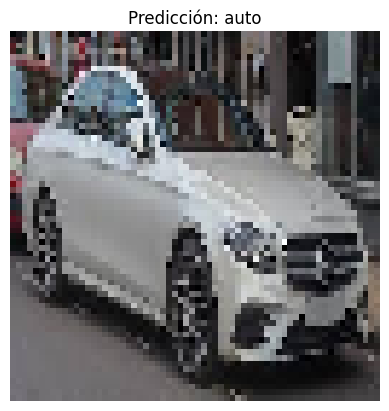

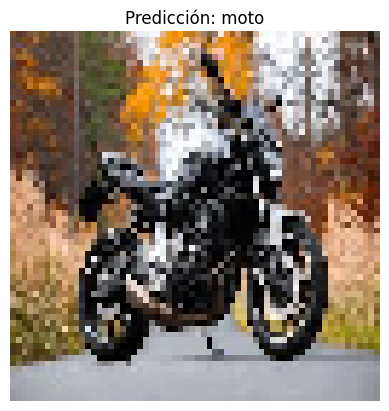

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

###########################################################################################################################
def carga_y_procesa_img(img_path):
    img = image.load_img(img_path, target_size=(64, 64)) # Carga la imagen y la redimensiona
    img_array = image.img_to_array(img)                  # Convierte a numpy array
    img_array = np.expand_dims(img_array, axis=0)        # Expande las dim. para que coincidan con la entrada del modelo
    img_array = img_array / 255.0                        # Normaliza
    return img_array

###########################################################################################################################
def clasifica(pred):
    if pred[0][0] > pred[0][1]:
        return "auto"
    else:
        return "moto"


##################################################### MAIN #################################################################
dir_img1 = "/content/dataset_Car_Bike/test_indiv/Car (453).jpeg"
dir_img2 = "/content/dataset_Car_Bike/test_indiv/Bike (319).jpeg"

#Procesa imágenes individuales
img1 = carga_y_procesa_img(dir_img1)
img2 = carga_y_procesa_img(dir_img2)

#Las introduce al modelo
pred1 = model.predict(img1)
pred2 = model.predict(img2)

#Imprime probabilidades
print("\nProb. para img1: {}".format(pred1))
print("Prob. para img2: {}".format(pred2)+"\n")

#Imprime la clasificación
print(f'La imagen 1 es un: {clasifica(pred1)}')
print(f'La imagen 2 es un: {clasifica(pred2)}' + "\n")

#Muestra las imágenes
imgA = image.load_img(dir_img1, target_size=(64, 64))
plt.imshow(imgA)
plt.title(f'Predicción: {clasifica(pred1)}')
plt.axis('off')
plt.show()

imgB = image.load_img(dir_img2, target_size=(64, 64))
plt.imshow(imgB)
plt.title(f'Predicción: {clasifica(pred2)}')
plt.axis('off')
plt.show()


